In [1]:
''' This version implements GPy to find the optimum hyperparameters '''

import pandas as pd

df = pd.read_excel("Skills.xlsx")
#print(df.head())

#Lets remove the importance values:

df2 = df.loc[df["Scale Name"] == "Level"]
df2.reset_index(drop = True, inplace = True)
#print(df2.head())

#Lets now remove the irrelevent columns:

df3 = df2.drop(columns = ["Scale ID","Scale Name","N","Recommend Suppress","Not Relevant","Date","Domain Source"])
print(df3.head())

#NOTE that we have ignored the suppress recomendations, we shall continue with this for now but will need to address this later


  O*NET-SOC Code             Title Element ID           Element Name  \
0     11-1011.00  Chief Executives    2.A.1.a  Reading Comprehension   
1     11-1011.00  Chief Executives    2.A.1.b       Active Listening   
2     11-1011.00  Chief Executives    2.A.1.c                Writing   
3     11-1011.00  Chief Executives    2.A.1.d               Speaking   
4     11-1011.00  Chief Executives    2.A.1.e            Mathematics   

   Data Value  Standard Error  Lower CI Bound  Upper CI Bound  
0        4.75            0.16            4.43            5.07  
1        4.88            0.23            4.43            5.32  
2        4.38            0.18            4.02            4.73  
3        4.88            0.13            4.63            5.12  
4        3.62            0.26            3.11            4.14  


In [2]:
#Lets now discover a bit about our data set:

df3.info()

#We note that there are some occupations for which the standard error and bound values are missing. Lets supress these for now:

df3.drop(columns = ["Standard Error","Lower CI Bound","Upper CI Bound"],inplace = True)
print(df3.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30555 entries, 0 to 30554
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   O*NET-SOC Code  30555 non-null  object 
 1   Title           30555 non-null  object 
 2   Element ID      30555 non-null  object 
 3   Element Name    30555 non-null  object 
 4   Data Value      30555 non-null  float64
 5   Standard Error  28700 non-null  float64
 6   Lower CI Bound  28700 non-null  float64
 7   Upper CI Bound  28700 non-null  float64
dtypes: float64(4), object(4)
memory usage: 1.9+ MB
  O*NET-SOC Code             Title Element ID           Element Name  \
0     11-1011.00  Chief Executives    2.A.1.a  Reading Comprehension   
1     11-1011.00  Chief Executives    2.A.1.b       Active Listening   
2     11-1011.00  Chief Executives    2.A.1.c                Writing   
3     11-1011.00  Chief Executives    2.A.1.d               Speaking   
4     11-1011.00  Chief Execut

In [3]:
#I shall implement the drop_duplicates method:

df4 = df3[["O*NET-SOC Code","Title"]]
df4.drop_duplicates(inplace=True)
df4.reset_index(drop = True, inplace = True)
#print(df4.head())

#We now need to add the variables. Begin by adding empty columns to the dataframe:

n_jobs = len(set((df3["Title"])))
n_variables = len(set((df3["Element Name"])))

for i in range(n_jobs):
    df4[df3["Element Name"][i]] = ""

#print(df4.head())
#Now we need to fill these columns:

x = df3.loc[df3["Title"] == "Chief Executives"]
y = x["Data Value"]

for i in range(n_variables):
    df4[df4.columns[2+i]][0] = y[i]
    
#We now need to do this procedure for every job:

for j in range(n_jobs):
    x = df3.loc[df3["Title"] == df4.iloc[j,1]]
    y = x["Data Value"]
    y.reset_index(drop = True, inplace = True)
    for i in range(n_variables):
        df4[df4.columns[2+i]][j] = y[i]


<ipython-input-3-398803c0bc0e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop_duplicates(inplace=True)
<ipython-input-3-398803c0bc0e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4[df3["Element Name"][i]] = ""
C:\Users\jacob\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_g

In [4]:
print(df4.head())
print(df4.tail())

  O*NET-SOC Code                                Title Reading Comprehension  \
0     11-1011.00                     Chief Executives                  4.75   
1     11-1011.03        Chief Sustainability Officers                  4.25   
2     11-1021.00      General and Operations Managers                   4.0   
3     11-2011.00  Advertising and Promotions Managers                   4.0   
4     11-2021.00                   Marketing Managers                  4.25   

  Active Listening Writing Speaking Mathematics Science Critical Thinking  \
0             4.88    4.38     4.88        3.62    1.12              4.75   
1              4.0    4.25     4.12        3.12    1.88              4.12   
2              4.0    3.88      4.0         2.5    1.12               4.0   
3             4.12    3.88     4.12        3.25    0.62              4.12   
4             4.12    3.88     4.12        3.12     1.5              4.25   

  Active Learning  ... Troubleshooting Repairing Quality Contr

### We now have the skills dataframe just as we want it!

In [ ]:
#Lets understand our data a bit:

df4.describe()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
hist = df4.iloc[:,20].hist(bins=20)

#We can inspect the histogram of any variable we want

### Let's now  import another dataframe with autovalues

In [5]:
df5 = pd.read_excel("US_data_email.xls")
df5 = df5[["Occupation Name","BLS codes","Training set automatable labels"]]
print(df5.head())

                                     Occupation Name BLS codes  \
0                            Recreational Therapists  29-1125_   
1  First-Line Supervisors of Mechanics Installers...  49-1011_   
2                     Emergency Management Directors  11-9161_   
3   Mental Health and Substance Abuse Social Workers  21-1023_   
4                                       Audiologists  29-1181_   

   Training set automatable labels  
0                              NaN  
1                              NaN  
2                              NaN  
3                              NaN  
4                              NaN  


In [6]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Occupation Name                  702 non-null    object 
 1   BLS codes                        702 non-null    object 
 2   Training set automatable labels  70 non-null     float64
dtypes: float64(1), object(2)
memory usage: 16.6+ KB


In [7]:
#Lets define a function so that we can make occupation ID's consistent:

def title_set(my_string):
    my_list = []
    my_list[:0] = my_string
    my_list.remove("_")
    my_list.append(".00")
    my_output = "".join(my_list)
    return my_output

#print(title_set("45-4023_"))

df5.iloc[:,1] = df5.iloc[:,1].apply(title_set)
print(df5.head())
df5.info()

                                     Occupation Name   BLS codes  \
0                            Recreational Therapists  29-1125.00   
1  First-Line Supervisors of Mechanics Installers...  49-1011.00   
2                     Emergency Management Directors  11-9161.00   
3   Mental Health and Substance Abuse Social Workers  21-1023.00   
4                                       Audiologists  29-1181.00   

   Training set automatable labels  
0                              NaN  
1                              NaN  
2                              NaN  
3                              NaN  
4                              NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Occupation Name                  702 non-null    object 
 1   BLS codes                        702 non-null    object 
 2   Training set

In [8]:
#Lets now concatenate the auto labels to our 1st dataframe:
import numpy as np
df4["Auto label value"] = np.nan
for i in list(df5["BLS codes"]):
    df4.loc[df4["O*NET-SOC Code"] == i,"Auto label value"] = list(df5.loc[df5["BLS codes"] == i,"Training set automatable labels"])

<ipython-input-8-27a20ac659ae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["Auto label value"] = np.nan
C:\Users\jacob\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\jacob\Anaconda3\lib\site-packages\pandas\core\indexing.py:1700: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [9]:
df4.info()

#Note - the auto value count is supposedly 330 non-null, even though it should be 70. After creating a csv from the dataframe,
#I found that there were 70 non-null as expected. Worth bringing up with Mike.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   O*NET-SOC Code                     873 non-null    object 
 1   Title                              873 non-null    object 
 2   Reading Comprehension              873 non-null    object 
 3   Active Listening                   873 non-null    object 
 4   Writing                            873 non-null    object 
 5   Speaking                           873 non-null    object 
 6   Mathematics                        873 non-null    object 
 7   Science                            873 non-null    object 
 8   Critical Thinking                  873 non-null    object 
 9   Active Learning                    873 non-null    object 
 10  Learning Strategies                873 non-null    object 
 11  Monitoring                         873 non-null    object 

In [ ]:
df4.to_csv("test.csv",index=False)

### We now have a dataset which encompass jobs titles, SOC codes, skill levels and hand picked auto labels

### Lets now split and standardize the data:

In [ ]:
#To prevent information about the distribution of the test set leaking into the model, we shall first form a training set
# and form a scaler operator from this, and then apply this to both training and test sets.


In [10]:
#Lets now create a training set which includes only the jobs for which we have hand picked auto values:

training_set = df4.dropna(axis=0,how="any")
training_set.reset_index(drop = True, inplace=True)
#print(training_set.head())
training_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   O*NET-SOC Code                     63 non-null     object 
 1   Title                              63 non-null     object 
 2   Reading Comprehension              63 non-null     object 
 3   Active Listening                   63 non-null     object 
 4   Writing                            63 non-null     object 
 5   Speaking                           63 non-null     object 
 6   Mathematics                        63 non-null     object 
 7   Science                            63 non-null     object 
 8   Critical Thinking                  63 non-null     object 
 9   Active Learning                    63 non-null     object 
 10  Learning Strategies                63 non-null     object 
 11  Monitoring                         63 non-null     object 
 

In [11]:
#Lets apply stratified sampling on this set to create a training and test set
#Code taken from Hands on Machine Learning book

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(training_set,training_set["Auto label value"]):
    strat_train_set = training_set.loc[train_index]
    strat_test_set = training_set.loc[test_index]


In [12]:
strat_train_set.reset_index(drop=True,inplace=True)
strat_test_set.reset_index(drop=True,inplace=True)

In [13]:
strat_train_set["Auto label value"].value_counts()/len(strat_train_set)

1.0    0.54
0.0    0.46
Name: Auto label value, dtype: float64

In [14]:
#Now that we have our training set, lets create a standardiser for it:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True,with_std=True)
scaler.fit(strat_train_set.iloc[:,2:37])
scaled_training_values = scaler.transform(strat_train_set.iloc[:,2:37])
scaled_test_values = scaler.transform(strat_test_set.iloc[:,2:37])
scaled_train_set = strat_train_set.copy()
scaled_test_set = strat_test_set.copy()
#print(strat_train_set.head())

In [15]:
temporary = pd.DataFrame(data=scaled_training_values)
temporary2 = pd.DataFrame(data=scaled_test_values) #we create temporary data frames from the numpy arrays we've just created
#print(temporary)
for i in range(2,37):
    scaled_train_set[scaled_train_set.columns[i]] = temporary[temporary.columns[i-2]]
    scaled_test_set[scaled_test_set.columns[i]] = temporary2[temporary2.columns[i-2]]

#print(scaled_test_set.head())

In [16]:
print(scaled_train_set.head())
print(scaled_test_set.head())

  O*NET-SOC Code                                              Title  \
0     13-2081.00   Tax Examiners and Collectors, and Revenue Agents   
1     19-1023.00                 Zoologists and Wildlife Biologists   
2     43-2011.00  Switchboard Operators, Including Answering Ser...   
3     35-9021.00                                        Dishwashers   
4     23-1023.00         Judges, Magistrate Judges, and Magistrates   

   Reading Comprehension  Active Listening   Writing  Speaking  Mathematics  \
0               0.622682          0.481653 -0.104328  0.349363     0.847035   
1               1.252416          0.481653  1.196523  0.529733     0.567301   
2              -0.787924         -0.855530 -1.236069 -1.038099    -1.245377   
3              -1.896257         -1.858417 -2.055605 -1.912200    -1.670573   
4               1.416147          2.995557  2.016059  1.917195    -0.417364   

    Science  Critical Thinking  Active Learning  ...  Repairing  \
0 -0.765287           0.064649 

### We now have a fully scaled training and test set!

### We can now perform Principal Component Analysis

In [ ]:
#We begin by creating a centred training set:

X = strat_train_set.drop(["Title","O*NET-SOC Code"],axis=1)

#We now use the Scikit learn toolkit to visualise how the explained variance ratio changes with no. dimensions:

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = range(len(X.columns))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.array(dim),np.array(cumsum))

In [ ]:
#Having visualized the effect of dimensionality, we can implement this to our dataset:

pca2 = PCA(n_components=0.95)
X_reduced = pca2.fit_transform(X)
print(X_reduced[1])


### We shall now fit a GP classifier to the unreduced dataset:

In [78]:
#Begin by creating numpy arrays for our input X and output Y:

X = np.array([scaled_train_set.iloc[:,2:37]])
Y = np.array([scaled_train_set.iloc[:,37]])
#X = np.transpose(X)
#Y = np.transpose(Y)
X = np.reshape(X,(50,35)) #Reshape to go from 3d matrix to 2d
Y = np.reshape(Y,(50,1)) # ^

#Now generate a kernel:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
import GPy

kernel = GPy.kern.RBF(input_dim=35, variance=100., lengthscale=100.)
m_gpy = GPy.models.GPClassification(X,Y,kernel)
m_gpy.optimize(messages=True)
#m_gpy.optimize_restarts(num_restarts = 10)


In [79]:
#We shall request values for the variance and lengthscale:

m_var = input("What is the rbf.variance?")
m_length = input("What is the rbf.lengthscale?")

m_var = float(m_var)
m_length = float(m_length)

What is the rbf.variance?3.48
What is the rbf.lengthscale?8.13


In [84]:
#Instantiate this model in scikit learn


sci_kernel = 0.035 * RBF(16.18)
gpc = GaussianProcessClassifier(kernel=sci_kernel,optimizer=None).fit(X, Y)

 C:\Users\jacob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


### Lets now apply k-fold cross validation on the model:

In [35]:
X_train = np.array(scaled_train_set.iloc[:,2:37])
#X_train = np.transpose(X_train)
y_train = np.array(scaled_train_set.iloc[:,37])
#y_train = np.transpose(y_train)

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)


for train_index, test_index in skfolds.split(X_train,y_train):
    clone_gpc = clone(gpc)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train[test_index]
    
    clone_gpc.fit(X_train_folds,y_train_folds)
    y_pred = clone_gpc.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))
    

NameError: name 'gpc' is not defined

### What about an F1 score?

In [36]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score

y_train_pred = cross_val_predict(gpc,X_train,y_train,cv=5)
f1_score(y_train,y_train_pred)

0.819672131147541

### And how about an AUC value?

In [45]:
from sklearn.metrics import roc_auc_score

def calc_AUC(gpc,X_train,y_train):
    y_probas = cross_val_predict(gpc,X_train,y_train,cv=5,method="predict_proba")
    y_scores = y_probas[:,1]
    return roc_auc_score(y_train,y_scores)

calc_AUC(gpc,X_train,y_train)

0.9452495974235104

### And a log-likelihood?

In [33]:
gpc.log_marginal_likelihood(theta=None, eval_gradient=False, clone_kernel=True)

-27.790532285631475

### It is worth using the model to predict values for the test set to ensure it is working as I want it to:

In [37]:
X_test = np.array(scaled_test_set.iloc[:,2:37])
y_test = np.array(scaled_test_set.iloc[:,37])

y_pred = gpc.predict(X_test)

In [38]:
print(y_test)
print(y_pred)

[0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0.]
[1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0.]


In [39]:
gpc.predict_proba(X_test)

array([[0.20683704, 0.79316296],
       [0.40218804, 0.59781196],
       [0.17108182, 0.82891818],
       [0.77033425, 0.22966575],
       [0.23937198, 0.76062802],
       [0.74785033, 0.25214967],
       [0.11365771, 0.88634229],
       [0.62841332, 0.37158668],
       [0.4116776 , 0.5883224 ],
       [0.12599255, 0.87400745],
       [0.46360226, 0.53639774],
       [0.24129618, 0.75870382],
       [0.87126597, 0.12873403]])

### We now have a fully working GP classifier!

### Lets now consider the interpretability:

In [86]:
#We shall use the feature permutation method:

from sklearn.inspection import permutation_importance
feature_importance = pd.DataFrame({"Features":np.array(training_set.columns[2:37])})

r = permutation_importance(gpc,X_test,y_test,n_repeats=30,random_state=0)
feature_importance["Importances"] = abs(r.importances_mean)
feature_importance = feature_importance.sort_values(by=['Importances'])
#feature_importance = feature_importance
print(feature_importance)
#print(r.importances_mean)

#for i in r.importances_mean.argsort()[::-1]:
#    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
#        print(f"{feature_importance.Features[i]:<8}"
#        f"{r.importances_mean[i]:.3f}"
#        f" +/- {r.importances_std[i]:.3f}")

                             Features  Importances
0               Reading Comprehension          0.0
19                Equipment Selection          0.0
20                       Installation          0.0
21                        Programming          0.0
22              Operations Monitoring          0.0
23              Operation and Control          0.0
24              Equipment Maintenance          0.0
18                  Technology Design          0.0
25                    Troubleshooting          0.0
27           Quality Control Analysis          0.0
28       Judgment and Decision Making          0.0
29                   Systems Analysis          0.0
30                 Systems Evaluation          0.0
31                    Time Management          0.0
32  Management of Financial Resources          0.0
26                          Repairing          0.0
33   Management of Material Resources          0.0
17                Operations Analysis          0.0
15                Service Orien

### Now that we have the feature importances, lets calculate the entropy:

In [87]:
# For the moment we won't normalise the distribution - might have to do this in the future (ask Mike)

def log_calc(my_list):    #This function deals with values of 0
    my_output = [0]*len(my_list)
    for i in range(len(my_list)):
        if my_list[i] != 0.0:
            my_output[i] = np.log(my_list[i])
    return my_output        
            
temp = abs(r.importances_mean)
tempnew = temp/sum(temp)
vector1 = np.array(tempnew)
vector2 = np.array(log_calc(abs(r.importances_mean)))
entropy = -1*np.dot(vector1,vector2)
print(entropy)

nan


 <ipython-input-87-d57d8f0d909b>:11: RuntimeWarning:invalid value encountered in true_divide


In [42]:
#Lets create a function that does all of this:

def calc_entropy(gpc,X_test,y_test):
    r = permutation_importance(gpc,X_test,y_test,n_repeats=30,random_state=0)
    temp = abs(r.importances_mean)
    tempnew = temp/sum(temp)
    vector1 = np.array(tempnew)
    vector2 = np.array(log_calc(abs(r.importances_mean)))
    return -1*np.dot(vector1,vector2)

calc_entropy(gpc,X_test,y_test)

4.005105365344748

### Lets now implement a gridsearch method:

In [ ]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(GaussianProcessClassifier(optimizer=None),{'kernel': [1*RBF(1),1*RBF(2)]},cv=5,return_train_score=False,scoring='roc_auc')
clf.fit(X,Y)
clf.cv_results_

In [ ]:
gridsearchdf = pd.DataFrame(clf.cv_results_)
gridsearchdf

In [80]:
#Lets try manually creating the functions:

n_lengthscale = 10
n_const = 10

#The above values control the number of different hyperparaemters we want to test on

lengthscale = np.linspace(0.01*m_length,1.99*m_length,n_lengthscale)
const = np.linspace(0.01*m_var,1.99*m_var,n_const)

resultsdf = pd.DataFrame({'length_scale':[0.0]*(n_lengthscale*n_const),'const':[0.0]*(n_lengthscale*n_const),'AUC':[0.0]*(n_lengthscale*n_const),"log-likelihood":[0.0]*(n_lengthscale*n_const),"entropy":[0.0]*(n_lengthscale*n_const)})

iteration = 0

for i in lengthscale:
    for j in const:
        kernel = j*RBF(i)
        gpc = GaussianProcessClassifier(kernel=kernel,optimizer=None).fit(X, Y)
        
        #y_probas = cross_val_predict(gpc,X_train,y_train,cv=5,method="predict_proba")
        #y_scores = y_probas[:,1]
        resultsdf.iloc[iteration]['AUC'] = calc_AUC(gpc,X_train,y_train)
        
        resultsdf.iloc[iteration]['log-likelihood'] = gpc.log_marginal_likelihood(theta=None, eval_gradient=False, clone_kernel=True)
        
        resultsdf.iloc[iteration]['length_scale'] = i
        resultsdf.iloc[iteration]['const'] = j
        
        
        resultsdf.iloc[iteration]['entropy'] = calc_entropy(gpc,X_test,y_test)
        

        #r = permutation_importance(gpc,X_test,y_test,n_repeats=30,random_state=0)
        #temp = abs(r.importances_mean)
        #tempnew = temp/sum(temp)
        #vector1 = np.array(tempnew)
        #vector2 = np.array(log_calc(abs(r.importances_mean)))
        #resultsdf.iloc[iteration]['entropy'] = -1*np.dot(vector1,vector2)
        
        iteration+=1

print(resultsdf.head())

 C:\Users\jacob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 C:\Users\jacob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 C:\Users\jacob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 C:\Users\jacob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 C:\Users\jacob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: 

 C:\Users\jacob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 C:\Users\jacob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 C:\Users\jacob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 C:\Users\jacob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 C:\Users\jacob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: 

 C:\Users\jacob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 C:\Users\jacob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 C:\Users\jacob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 C:\Users\jacob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 C:\Users\jacob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: 

   length_scale   const  AUC  log-likelihood   entropy
0        0.0813  0.0348  0.5      -34.658278  3.539025
1        0.0813  0.8004  0.5      -34.931497  3.514510
2        0.0813  1.5660  0.5      -35.315301  3.514510
3        0.0813  2.3316  0.5      -35.649070  3.514510
4        0.0813  3.0972  0.5      -35.921267  3.514510


In [88]:
resultsdf = resultsdf.sort_values(by=['log-likelihood'])
resultsdf = resultsdf.dropna() #Drop NaNs from too small variance models

In [ ]:
''' Consider dropping innacurate models. We do not care about these models and they could potentially alter the clustering '''

In [89]:
print(resultsdf.head(20))

    length_scale   const       AUC  log-likelihood   entropy
9         0.0813  6.9252  0.500000      -36.743485  3.514510
8         0.0813  6.1596  0.500000      -36.622899  3.514510
7         0.0813  5.3940  0.500000      -36.486351  3.514510
6         0.0813  4.6284  0.500000      -36.328928  3.514510
5         0.0813  3.8628  0.500000      -36.143748  3.514510
4         0.0813  3.0972  0.500000      -35.921267  3.514510
3         0.0813  2.3316  0.500000      -35.649070  3.514510
2         0.0813  1.5660  0.500000      -35.315301  3.514510
1         0.0813  0.8004  0.500000      -34.931497  3.514510
0         0.0813  0.0348  0.500000      -34.658278  3.539025
70       12.6015  0.0348  0.711755      -34.585108  4.369193
10        1.8699  0.0348  0.892110      -34.562734  3.415166
60       10.8129  0.0348  0.716586      -34.542020  3.081624
50        9.0243  0.0348  0.724638      -34.490766  4.270421
40        7.2357  0.0348  0.737520      -34.436602  4.192510
91       16.1787  0.8004

### Lets visualise the accuracy vs interpretability:

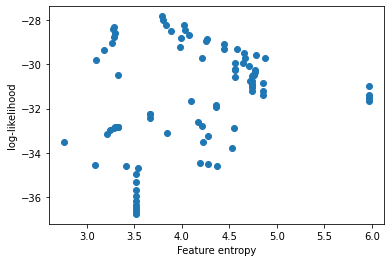

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt

#plt = resultsdf.plot.scatter(x="entropy",y="log-likelihood")
plt.scatter(resultsdf['entropy'],resultsdf['log-likelihood'])
plt.xlabel("Feature entropy")
plt.ylabel("log-likelihood")
#plt.show()
plt.savefig('clustergraph.png',bbox_inches='tight')
plt.show()

In [55]:
plt.savefig('clustergraph.png')

<Figure size 432x288 with 0 Axes>

### We shall now apply K-means to identify the clusters

In [112]:
n = input("How many clusters?")

How many clusters?4


In [113]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=int(n))
c_predicted = km.fit_predict(resultsdf[["log-likelihood","entropy"]])
resultsdf["cluster"]=c_predicted
resultsdf.head()

,length_scale,const,AUC,log-likelihood,entropy,cluster
9,0.0813,6.9252,0.5,-36.743485,3.51451,3
8,0.0813,6.1596,0.5,-36.622899,3.51451,3
7,0.0813,5.3940,0.5,-36.486351,3.51451,3
6,0.0813,4.6284,0.5,-36.328928,3.51451,3
5,0.0813,3.8628,0.5,-36.143748,3.51451,3


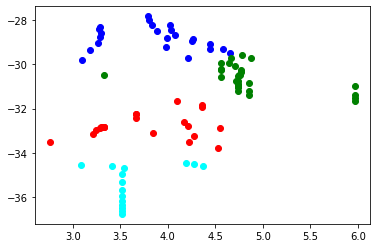

In [114]:
#First create a dictionary for colours:

colour_dict = {
  0: "blue",
  1: "red",
  2: "green",
  3: "cyan",
  4: "magenta",
  5: "yellow",
  6: "black",
}

data_frames = []

for i in range(int(n)):
    data_frames.append(resultsdf[resultsdf.cluster == i])
    plt.scatter(data_frames[i].entropy,data_frames[i]["log-likelihood"],color=colour_dict[i])

#df1 = resultsdf[resultsdf.cluster == 0]
#df2 = resultsdf[resultsdf.cluster == 1]
#df3 = resultsdf[resultsdf.cluster == 2]
#df4 = resultsdf[resultsdf.cluster == 3]

#plt.scatter(df1.entropy,df1["log-likelihood"],color="blue")
#plt.scatter(df2.entropy,df2["log-likelihood"],color="red")
#plt.scatter(df3.entropy,df3["log-likelihood"],color="green")
#plt.scatter(df4.entropy,df4["log-likelihood"],color="black")

In [ ]:
''' It is possible that the user will not be happy with how the data has been assigned.
Offer an option for them to redo the clustering . '''

### We now need to select the median  model (based on accuracy) from each of these clusters:

In [124]:
#Lets create a list of models and their accuracies:

models = []
accuracies = []


#Can't use median function because it finds an average for even sets

for i in range(int(n)):
    index = int(data_frames[i].shape[0]/2)
    observation = data_frames[i].iloc[index]
    kernel = float(observation['const'])*RBF(float(observation['length_scale']))
    gp = GaussianProcessClassifier(kernel=kernel,optimizer=None).fit(X, Y)
    models.append(gp)
    accuracies.append(observation['log-likelihood'])

 C:\Users\jacob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 C:\Users\jacob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 C:\Users\jacob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 C:\Users\jacob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [125]:
#For the moment, we shall generate an explanation based on feature importance across the different clusters:


tables = []

for i in range(int(n)):
    tables.append(pd.DataFrame({"Features":np.array(training_set.columns[2:37])}))


for i in range(int(n)):
    r = permutation_importance(models[i],X_test,y_test,n_repeats=30,random_state=0)
    tables[i]["Importances"] = abs(r.importances_mean)
    tables[i] = tables[i].sort_values(by=["Importances"],ascending=False)
    tables[i].reset_index(drop = True, inplace = True)
    
    
    
#for i in range(int(n)):
    #r = permutation_importance(models[i],X_test,y_test,n_repeats=30,random_state=0)
    #importance_table["Importances{}".format(i)] = abs(r.importances_mean)
    #importance_table = importance_table.sort_values(by=['Importances{}'.format(i)])

#NOTE - I'm uneasy about using the same test sets as before, should I expand to the unknown jobs?

importance_dict = {}
for i in range(int(n)):
    q = tables[i]
    importance_dict["Importance{}".format(i)] = q["Features"]
#q = tables[1]
#importance_dict["Importance1"] = q["Features"]
importance_table = pd.DataFrame(data=importance_dict)

In [126]:
print(importance_table)

                          Importance0                        Importance1  \
0                         Instructing                       Installation   
1               Reading Comprehension           Quality Control Analysis   
2                 Learning Strategies              Operations Monitoring   
3                             Writing                    Time Management   
4            Quality Control Analysis                          Repairing   
5   Management of Personnel Resources              Equipment Maintenance   
6                     Troubleshooting                   Systems Analysis   
7                  Systems Evaluation              Reading Comprehension   
8    Management of Material Resources                            Writing   
9                          Monitoring                  Technology Design   
10                Service Orientation              Operation and Control   
11                         Persuasion  Management of Personnel Resources   
12          

### We now have a table of features sorted by how important they are for each cluster, based on the permutation method

In [ ]:
# We shall generate one more table, which will have a row for each feature and a score for how important it is:

final_importance_table = pd.DataFrame({"Features":np.array(training_set.columns[2:37]),"Importance":np.zeros(np.shape(training_set.columns[2]))})
feature_list = final_importance_table['Features'].tolist()
#final_importance_table.head()
for i in feature_list:
    for j in range(int(n)):
        index_val = importance_table.index[importance_table["Importance{}".format(j)]==i]
        final_importance_table.loc[final_importance_table["Features"]==i,"Importance"] += index_val.tolist()[0]
    
final_importance_table = final_importance_table.sort_values(by=["Importance"],ascending=True)
final_importance_table.reset_index(drop = True, inplace = True)
final_importance_table

### We now have a table which ranks features by importance across all the clusters! Note that is values each cluster equally - this might be something we can improve upon

In [ ]:
#Lets divert our attention towards making predictions on our unknown jobs:

unknown_jobs = df4[df4.isna().any(axis=1)] #This is our set of unknown jobs
#SCALE THE DATA! - Do I need to fit a new scaler?
X = scaler.transform(unknown_jobs.iloc[:,2:37])
#X = np.array(unknown_jobs.iloc[:,2:37])
print(X)
#for i in int(n):
    #models[i].predict_proba(X)

In [ ]:
#test = gpc.predict_proba(X)
test1 = gpc.predict(X)
test2 = gpc.predict_proba(X)
print(test1)


In [ ]:
#Now fill in the dataframe:

unknown_jobs["Auto label value"] = test1
unknown_jobs["Auto probability"] = test2[:,1]
unknown_jobs.head()

In [ ]:
unknown_jobs.tail()

In [ ]:
np.shape(test1)

In [ ]:
#Now lets think about how we can apply the model from each of our clusters and compute an average:

for i in range(int(n)):
    probs = models[i].predict_proba(X)
    unknown_jobs["Auto probability{}".format(i)] = probs[:,1]

#We need a list of column titles:
column_titles = []
for i in range(int(n)):
    column_titles.append("Auto probability{}".format(i))

#Now calculate mean automotability    

unknown_jobs["Auto probability"] = unknown_jobs[column_titles].mean(axis=1)

#And finally apply a function to determine auto-label value:

def label_auto(my_input):
    if my_input - 0.5 < 0:
        return 0
    else:
        return 1

unknown_jobs["Auto label value"] = unknown_jobs["Auto probability"].apply(label_auto)

unknown_jobs.head()

In [ ]:
print(unknown_jobs["Title"]["i"])

### We have now generated values for automotability!